In [9]:
from SAES.plots.Pplot import Pplot

In [10]:
"""
In order to generate the HTML code from the notebook, write this command in the terminal:
jupyter nbconvert --to html --no-input multiobjective_optimization.ipynb

If you do not have jupyter installed, you can use the python terminal:
python -m nbconvert --to html --no-input multiobjective_optimization.ipynb
""";

In [11]:
# Load the experiment data
experimentData = "swarmIntelligence.csv"
metrics = "multiobjectiveMetrics.csv"

# Comparative study of multi-objective metaheuristics using Bayesian Posterior Plot

## HV quality indicator and NSGAII as Pivot Algorithm

In [12]:
metric = "HV"
pivot = "NSGAII"

## Posterior Plot using Bayesian Sign Test

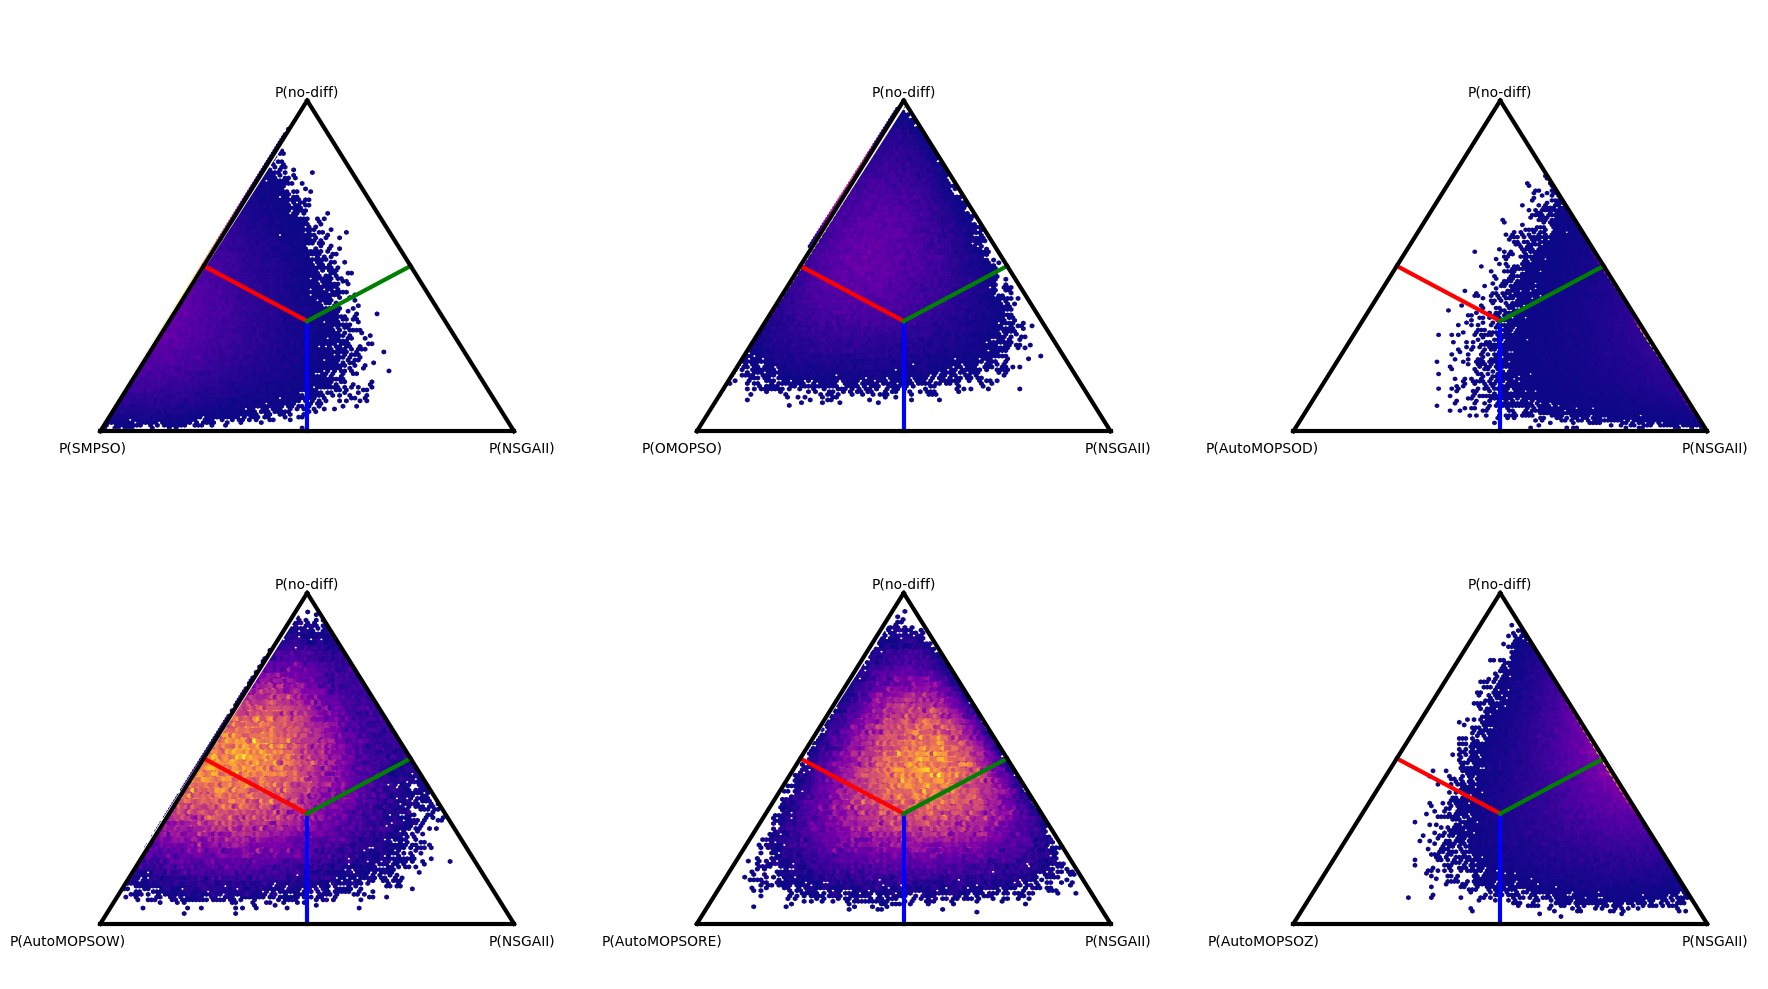

In [13]:
Pplot(experimentData, metrics, metric, bayesian_test="sign").show_pivot(pivot)

## Posterior Plot using Bayesian Signed Rank Test

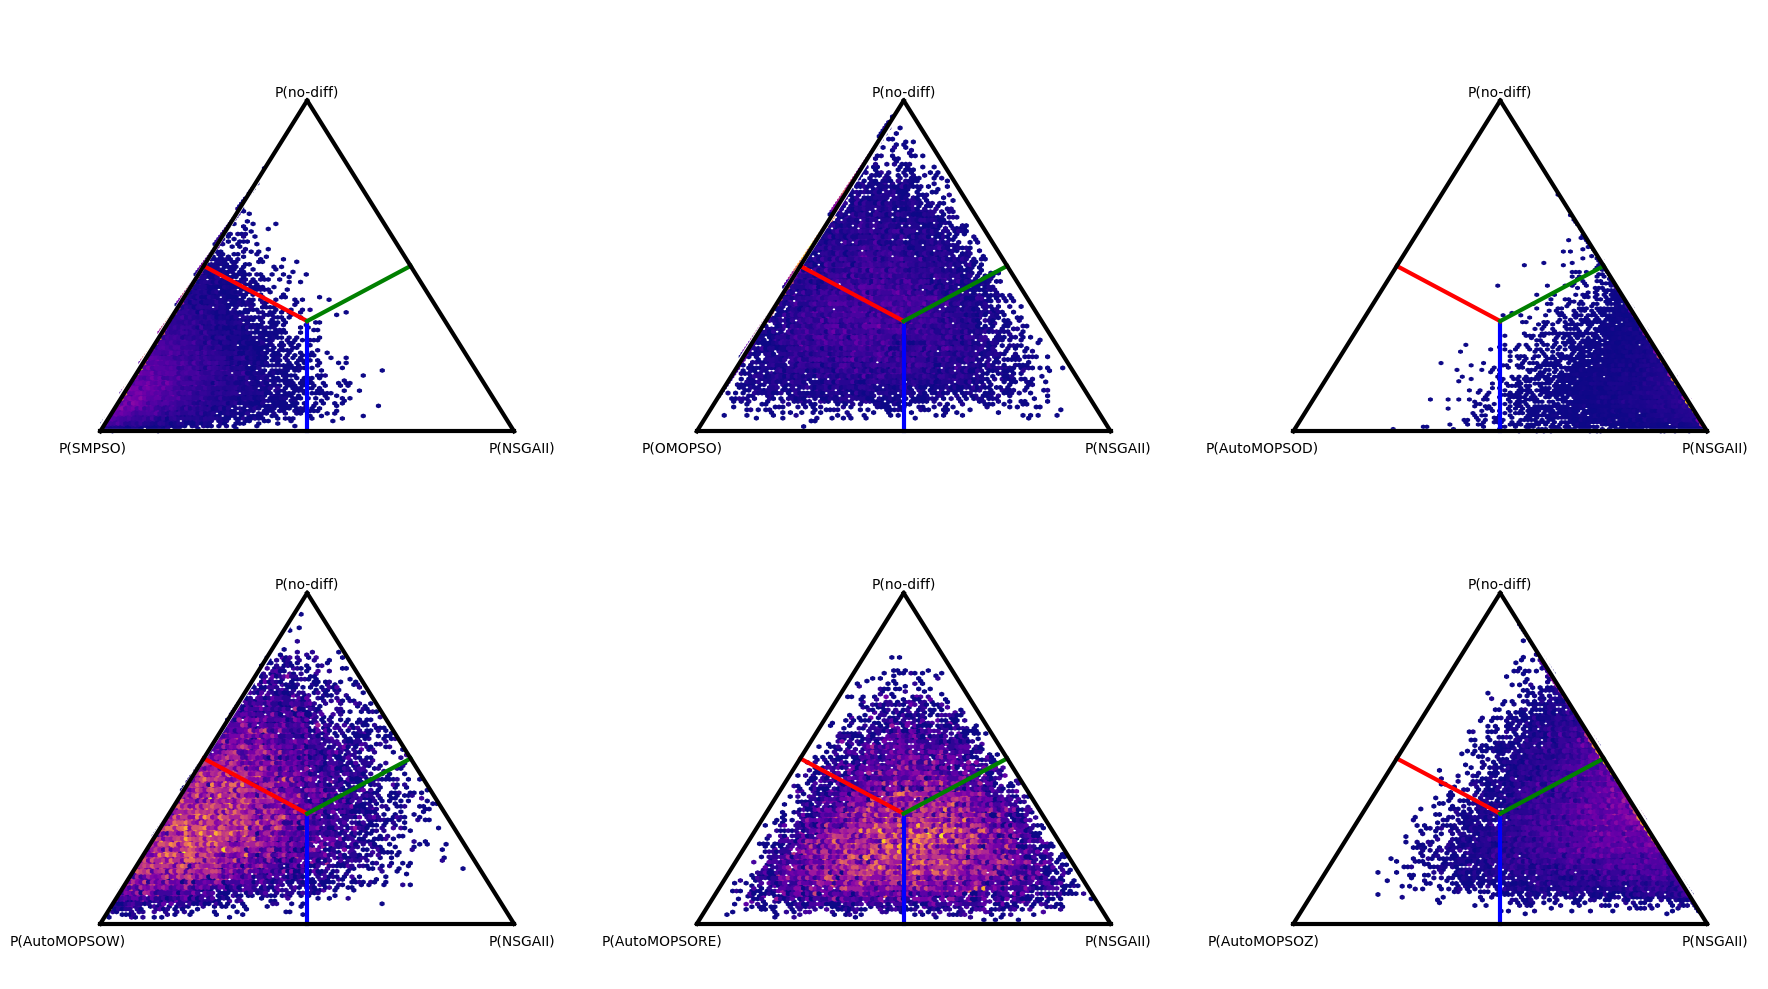

In [14]:
Pplot(experimentData, metrics, metric, bayesian_test="rank").show_pivot(pivot)